<a href="https://colab.research.google.com/github/hawk20434/Software-tools-for-data-collection/blob/main/PW_02_Lygin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Вариант - 8.** Анализ статистики торгов на Шанхайской бирже

В таблице представлено годовое развитие индекса SSE Composite с 1990 года, который отражает динамику торгов на Шанхайской фондовой бирже по годам. Данные включают ключевые показатели для анализа изменений индекса и его трендов за каждый год:

**Год -** Указывает календарный год, к которому относятся данные о торговле.


**Уровень закрытия -** Финальная цена индекса на момент закрытия торгов в конце года.


**Изменение индекса в пунктах -** Разница между уровнем закрытия в текущем и предыдущем годах, измеряемая в пунктах.


**Изменение индекса в процентах -** Процентное изменение индекса по сравнению с предыдущим годом, показывающее, насколько сильно изменился индекс за год.

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
url = 'https://en.wikipedia.org/wiki/SSE_Composite_Index'
response = requests.get(url)
page_content = response.content

In [3]:
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find('table', {'class': 'wikitable sortable'})
rows = table.find_all('tr')

In [4]:
data = []
for row in rows[1:]:
 cols = row.find_all('td')
 cols = [ele.text.strip() for ele in cols]
 data.append(cols)

df = pd.DataFrame(data, columns=['Year', 'Closing level', 'Change in Points', 'Change in %'])

In [5]:
df.head()

,Year,Closing level,Change in Points,Change in %
0,1990,127.61,,
1,1991,292.75,165.14,129.41
2,1992,780.39,487.64,165.57
3,1993,833.80,53.41,6.84
4,1994,647.87,−185.93,−22.30


In [8]:
# предобработка данных
df['Year'] = df['Year'].astype(str)
df['Closing level'] = df['Closing level'].astype(str)
df['Change in Points'] = df['Change in Points'].astype(str)
df['Change in %'] = df['Change in %'].astype(str)

In [9]:
# подготовка данных к анализу
df['Closing level'] = pd.to_numeric(df['Closing level'].str.replace('−', '-').str.replace(',', ''), errors='coerce')
df['Change in Points'] = pd.to_numeric(df['Change in Points'].str.replace('−', '-').str.replace(',', ''), errors='coerce')
df['Change in %'] = pd.to_numeric(df['Change in %'].str.replace('−', '-').str.replace(',', '.').str.replace('%', ''), errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

In [10]:
# изменение наименований столбцов для минимации ошибок и удобства использования
df = df.rename(columns={
    'Closing level': 'Close',
    'Change in Points': 'Points',
    'Change in %': 'Persent'})

In [11]:
print(df.dtypes)
print(df.head())

Year         Int64
Close      float64
Points     float64
Persent    float64
dtype: object
   Year   Close  Points  Persent
0  1990  127.61     NaN      NaN
1  1991  292.75  165.14   129.41
2  1992  780.39  487.64   165.57
3  1993  833.80   53.41     6.84
4  1994  647.87 -185.93   -22.30


In [14]:
# описательная статистика
stats = df.describe()
stats

,Year,Close,Points,Persent
count,34.0,34.000000,33.000000,33.000000
mean,2006.5,2094.032647,86.403939,19.158485
std,9.958246,1187.960732,932.077322,51.402566
min,1990.0,127.610000,-3440.750000,-65.390000
25%,1998.25,1169.312500,-230.550000,-14.310000
50%,2006.5,2094.730000,69.710000,4.800000
75%,2014.75,3079.475000,361.740000,30.220000
max,2023.0,5261.560000,2586.090000,165.570000


In [17]:
# корреляционная матрица
correlation_matrix = df.corr()
correlation_matrix

,Year,Close,Points,Persent
Year,1.000000,0.811275,-0.064111,-0.332222
Close,0.811275,1.000000,0.357600,0.026555
Points,-0.064111,0.357600,1.000000,0.699565
Persent,-0.332222,0.026555,0.699565,1.000000


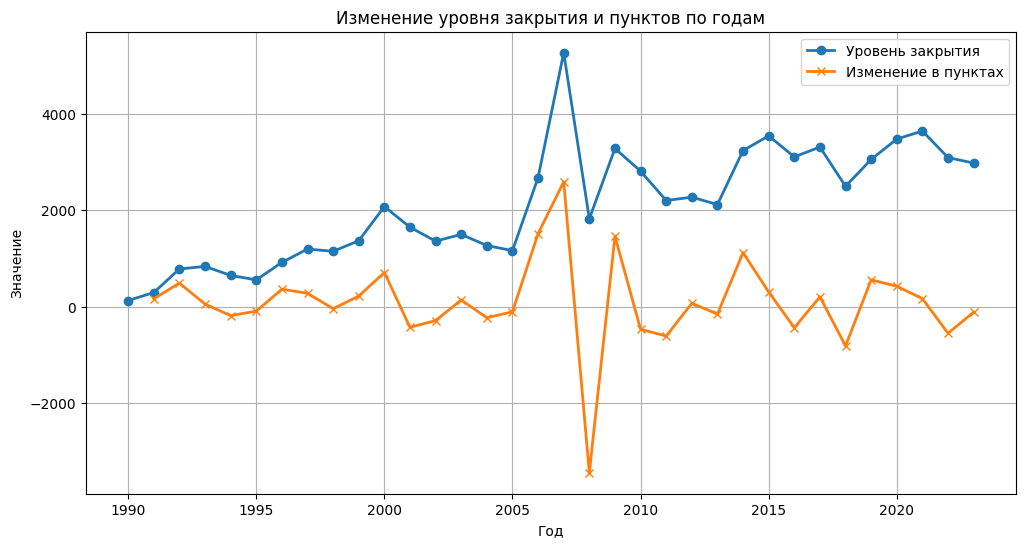

In [26]:
# простой график изменения по годам
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Close'], marker='o', label='Уровень закрытия', linewidth=2)
plt.plot(df['Year'], df['Points'], marker='x', label='Изменение в пунктах', linewidth=2)
plt.xlabel('Год')
plt.ylabel('Значение')
plt.title('Изменение уровня закрытия и пунктов по годам')
plt.legend()
plt.grid(True)
plt.show()

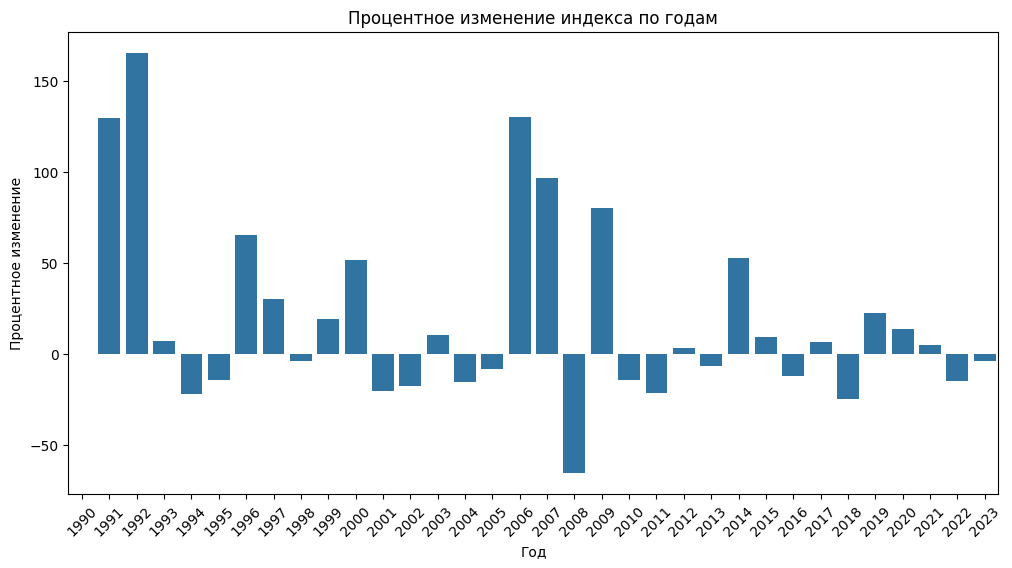

In [28]:
# столбчатая диаграмма для процентных изменений
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Persent', data=df)
plt.xlabel('Год')
plt.ylabel('Процентное изменение')
plt.title('Процентное изменение индекса по годам')
plt.xticks(rotation=45)
plt.show()

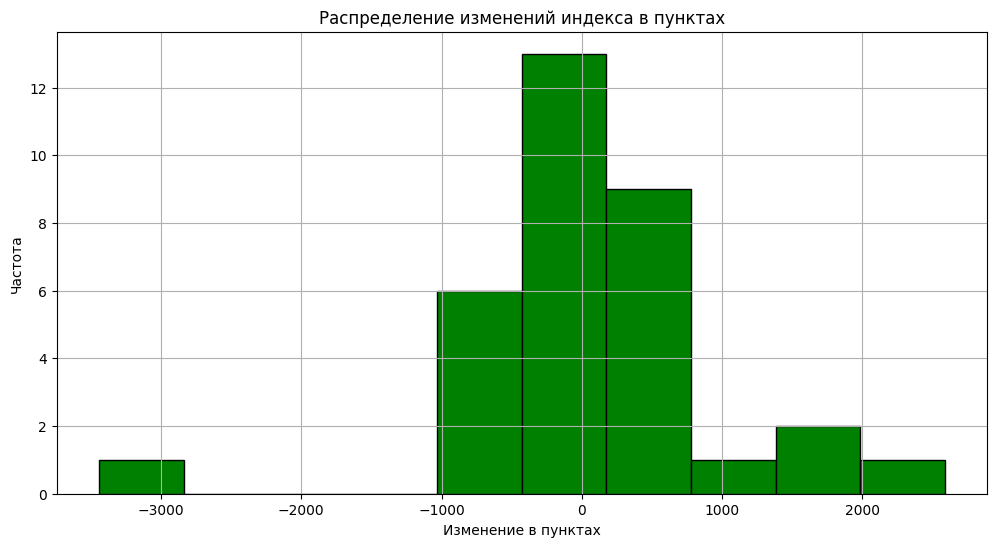

In [29]:
# гистограмма изменений в пунктах
plt.figure(figsize=(12, 6))
plt.hist(df['Points'], bins=10, color='green', edgecolor='black')
plt.xlabel('Изменение в пунктах')
plt.ylabel('Частота')
plt.title('Распределение изменений индекса в пунктах')
plt.grid(True)
plt.show()

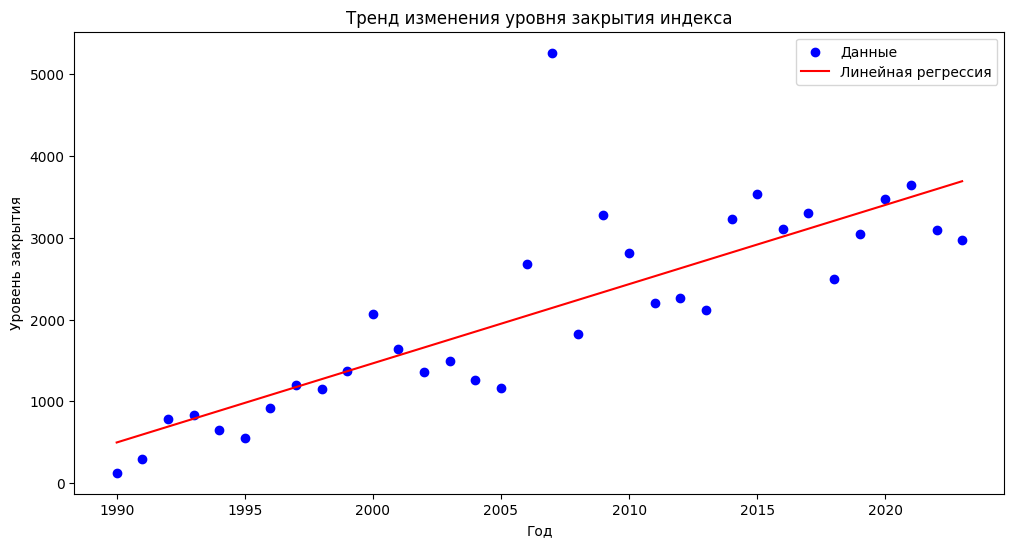

In [30]:
X = df[['Year']].values
y = df['Close'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# визуализация тренда
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Close'], color='blue', label='Данные')
plt.plot(df['Year'], y_pred, color='red', label='Линейная регрессия')
plt.xlabel('Год')
plt.ylabel('Уровень закрытия')
plt.title('Тренд изменения уровня закрытия индекса')
plt.legend()
plt.show()

**Выводы:**

- Высокая волатильность в начале 1990-х.В период с 1990 по 1994 годы индекс демонстрировал значительные колебания. В 1991 году рост составил более 129%, а в 1992 году — 165%. Однако в 1994 году индекс упал на 22%. Это говорит о высоком уровне неопределенности на рынке в этот период.
-Восстановление после кризиса 2008 года. После резкого падения в 2008 году, индекс восстанавливался в 2009 году с ростом на 79.98%. Однако в последующие годы волатильность сохранилась, с чередующимися положительными и отрицательными изменениями.
- Относительно стабильное поведение в последние годы. В период с 2020 по 2023 год индекс колебался с меньшей амплитудой, с изменениями от -15.03% в 2022 году до +13.87% в 2020 году. Это указывает на некоторое стабилизирование рынка по сравнению с предыдущими десятилетиями.

Рынок демонстрирует сильную волатильность, с резкими изменениями индекса как в положительную, так и в отрицательную сторону. Ключевые факторы, такие как глобальные экономические кризисы, вероятно, оказывали значительное влияние на китайский фондовый рынок. Однако долгосрочная тенденция указывает на устойчивый рост индекса.